In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bikes = pd.read_csv('datasets/bikes.csv')

In [4]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


In [5]:
bikes.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


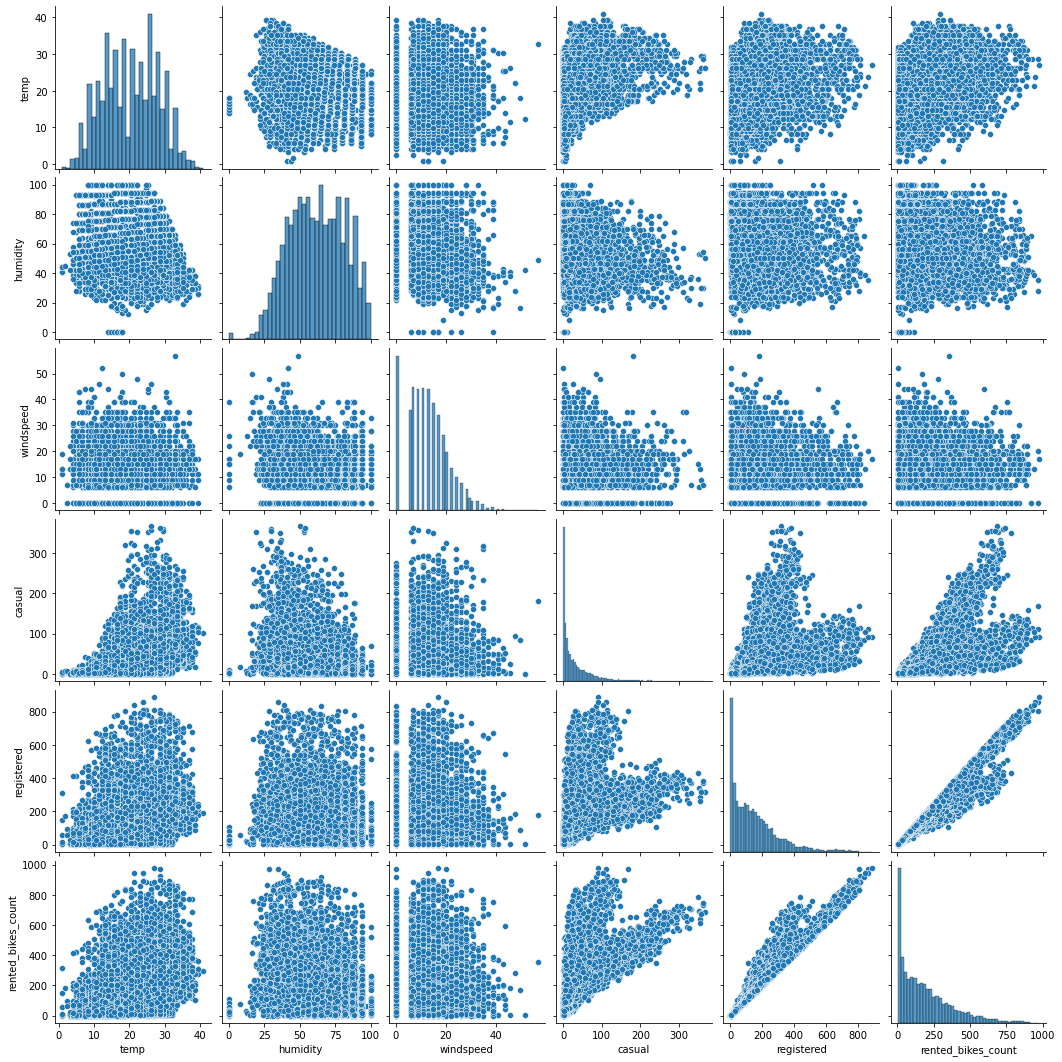

In [7]:
sns.pairplot(data=bikes.drop(columns=['holiday', 'workingday']))

<AxesSubplot:xlabel='temp', ylabel='Density'>

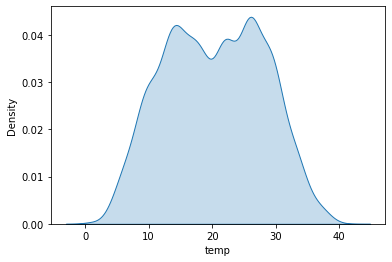

In [9]:
sns.kdeplot(bikes['temp'], shade=True)

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Density'>

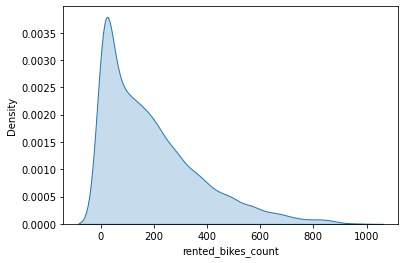

In [11]:
sns.kdeplot(bikes['rented_bikes_count'], shade=True)

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [14]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 935.6+ KB


In [16]:
bikes['day'] = bikes['datetime'].dt.day
bikes['month'] = bikes['datetime'].dt.month
bikes['hour'] = bikes['datetime'].dt.hour

In [17]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,day,month,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,1,1,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,1,1,4


<AxesSubplot:xlabel='month', ylabel='rented_bikes_count'>

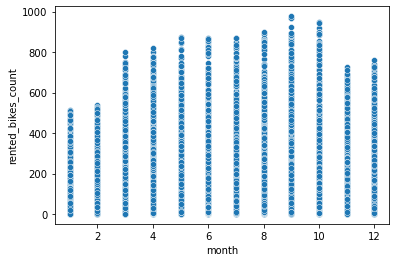

In [18]:
sns.scatterplot(data=bikes, y='rented_bikes_count', x='month')

<AxesSubplot:xlabel='month'>

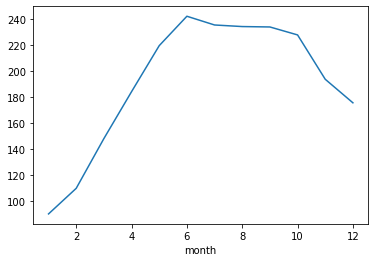

In [24]:
bikes.groupby('month').mean()['rented_bikes_count'].plot()

<AxesSubplot:xlabel='hour', ylabel='rented_bikes_count'>

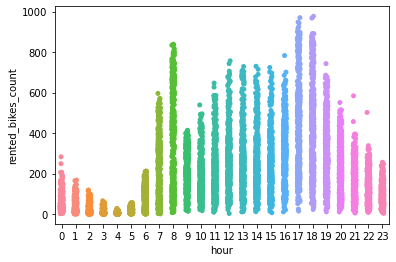

In [25]:
sns.stripplot(data=bikes, x='hour', y='rented_bikes_count')

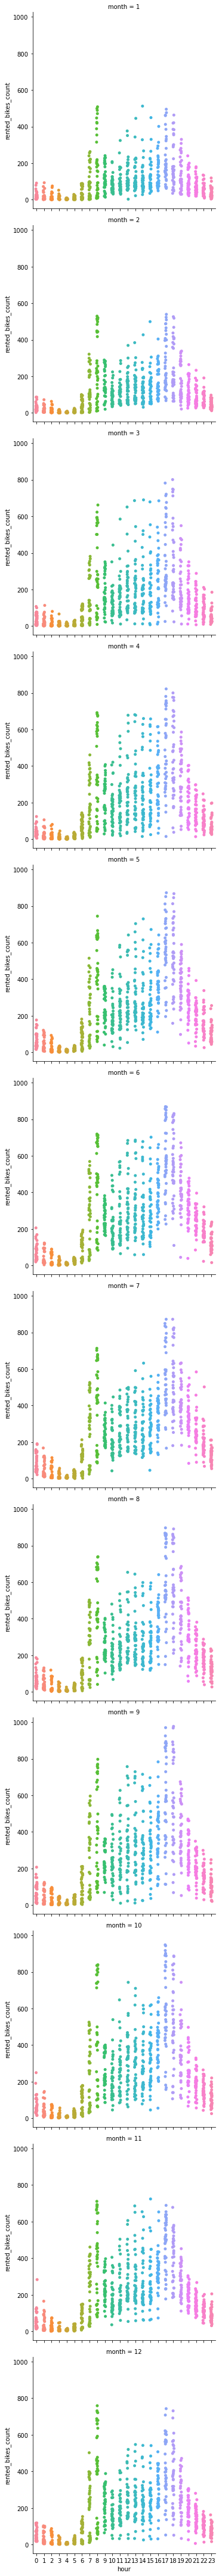

In [26]:
sns.catplot(data=bikes, x='hour', y='rented_bikes_count', kind='strip', row='month')

In [27]:
bikes.corr()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,day,month,hour
holiday,1.000000,-0.249189,-0.001047,0.016190,0.010463,0.042519,-0.021017,-0.005827,-0.015380,0.000840,0.001522
workingday,-0.249189,1.000000,0.018954,-0.019167,0.020668,-0.318348,0.118612,0.010940,0.008556,-0.003518,0.004650
temp,-0.001047,0.018954,1.000000,-0.068240,-0.025425,0.466035,0.315430,0.391867,0.014473,0.269902,0.147415
humidity,0.016190,-0.019167,-0.068240,1.000000,-0.312628,-0.344939,-0.266432,-0.317282,-0.016969,0.201084,-0.287224
windspeed,0.010463,0.020668,-0.025425,-0.312628,1.000000,0.085055,0.089105,0.097747,0.037623,-0.172232,0.145908
casual,0.042519,-0.318348,0.466035,-0.344939,0.085055,1.000000,0.497250,0.690414,0.014109,0.092722,0.302045
registered,-0.021017,0.118612,0.315430,-0.266432,0.089105,0.497250,1.000000,0.970948,0.019111,0.169451,0.380540
rented_bikes_count,-0.005827,0.010940,0.391867,-0.317282,0.097747,0.690414,0.970948,1.000000,0.019826,0.166862,0.400601
day,-0.015380,0.008556,0.014473,-0.016969,0.037623,0.014109,0.019111,0.019826,1.000000,0.001974,0.001132
month,0.000840,-0.003518,0.269902,0.201084,-0.172232,0.092722,0.169451,0.166862,0.001974,1.000000,-0.006818


<AxesSubplot:>

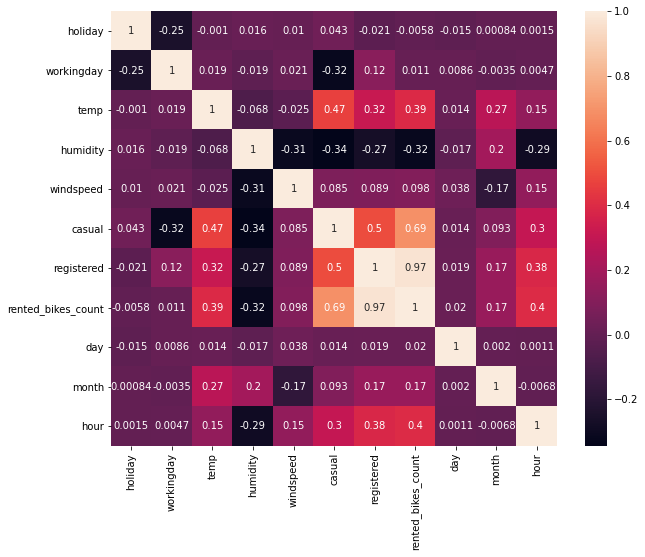

In [30]:
plt.figure(figsize=(10, 8))

sns.heatmap(bikes.corr(), annot=True)

In [33]:
bikes['day_of_week'] = bikes['datetime'].dt.dayofweek

<AxesSubplot:>

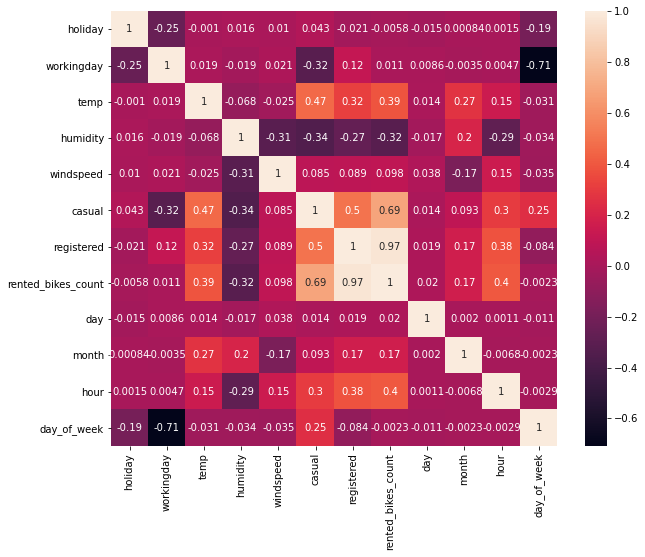

In [34]:
plt.figure(figsize=(10, 8))

sns.heatmap(bikes.corr(), annot=True)

<AxesSubplot:xlabel='day_of_week', ylabel='rented_bikes_count'>

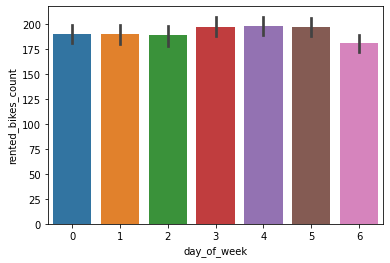

In [35]:
sns.barplot(data=bikes, x='day_of_week', y='rented_bikes_count')

<AxesSubplot:xlabel='month', ylabel='rented_bikes_count'>

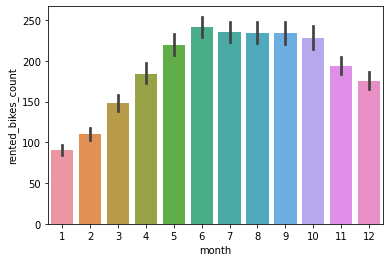

In [36]:
sns.barplot(data=bikes, x='month', y='rented_bikes_count')

<AxesSubplot:xlabel='month', ylabel='rented_bikes_count'>

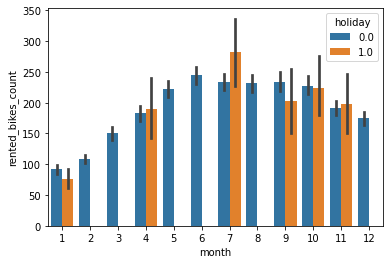

In [37]:
sns.barplot(data=bikes, x='month', y='rented_bikes_count', hue='holiday')